# Graident decent
## 普通的梯度下降

梯度下降的实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

### 建立模型

依然使用线性模型

In [2]:
#随机在指定区间选择一个数字用来计算其梯度，此时的W是全局变量
#w = random.uniform(0.0,4.1)
w = 3.1
print('w = ',w)

def forward(x):
    return x*w

w =  3.1


### Loss函数，并计算出MSE

>注：MSE是**全部训练数据**Loss的平均值，下面会有随机梯度下降的例子

In [10]:
# 定义loss函数，计算出对应w值其的error

def mse(xs, ys):
    cost = 0
    for x, y in zip(xs, ys):
        y_perd = forward(x)
        cost += (y_perd - y)**2
    return cost/len(xs)

### optimization
运用梯度下降法进行优化

进一步解释就是，不同的w是会有不同的MSE，可以根据随机选的w来计算其所在的MSE上的梯度


In [11]:
# 计算w在对应点的梯度（公式涉及相关数学知识，略；并且是平均的梯度）
def gradient(xs, ys):
    grad = 0
    for x, y in zip(xs, ys):
        grad += 2*x*(x*w-y)
    return grad/len(xs)

### main 函数

In [12]:
# 建立两个数组储存相关数据
loss_list = []
epoch_list = []

# 进行100次更新，即100次训练 
print('predict before training', 4, forward(4))
for epoch in range(100):
    epoch_list.append(epoch)
    
    mse_val = mse(x_data, y_data)
    loss_list.append(mse_val)
    
    grad_val = gradient(x_data, y_data)
    
    # 注意！！ 这里的0.01(learning rate)是 hyperparameter
    # 有时候不能取太大，训练多次loss可能会上升
    # 根据定义更新w的数值
    w -= 0.01* grad_val

    print('Epoch:', epoch, ' w=:', w, ' loss=', mse_val)

print('predict after training', 4, forward(4))

predict before training 4 12.4
Epoch: 0  w=: 2.9973333333333336  loss= 5.646666666666668
Epoch: 1  w=: 2.904248888888889  loss= 4.641810962962966
Epoch: 2  w=: 2.8198523259259263  loss= 3.8157749142650226
Epoch: 3  w=: 2.743332775506173  loss= 3.1367365695220406
Epoch: 4  w=: 2.6739550497922635  loss= 2.5785368706613165
Epoch: 5  w=: 2.611052578478319  loss= 2.1196719093222973
Epoch: 6  w=: 2.554021004487009  loss= 1.742464517103344
Epoch: 7  w=: 2.5023123774015548  loss= 1.432383275926375
Epoch: 8  w=: 2.455429888844076  loss= 1.1774827142904087
Epoch: 9  w=: 2.412923099218629  loss= 0.9679431237117955
Epoch: 10  w=: 2.374383609958224  loss= 0.7956922673854828
Epoch: 11  w=: 2.3394411396954564  loss= 0.6540944078916399
Epoch: 12  w=: 2.3077599666572137  loss= 0.537694674149502
Epoch: 13  w=: 2.2790357031025406  loss= 0.44200891969196343
Epoch: 14  w=: 2.25299237081297  loss= 0.3633509768276697
Epoch: 15  w=: 2.2293797495370926  loss= 0.2986906518846472
Epoch: 16  w=: 2.207970972913630

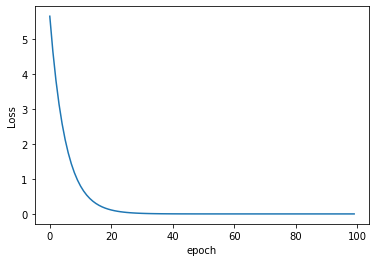

In [13]:
plt.plot(epoch_list, loss_list)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

## 随机梯度下降
每次用随机的一个样本的的loss进行更新
但不能进行并行计算
相当于进行batch的更新

In [3]:
def loss(x,y):
    y_perd = forward(x)
    
    # 只用一组的loss就进行参数的更新
    return (y_perd - y)**2

def gradient_ar(x, y):
    return 2*x*(x*w - y)

In [4]:
# 建立两个数组储存相关数据
loss_list = []
epoch_list = []
num = 0

# 进行100次更新，即100次训练 
print('predict before training', 4, forward(4))
for epoch in range(100):
    for x, y in zip(x_data, y_data):
        epoch_list.append(num)
        num += 1
        grad = gradient_ar(x, y)
        
        # 注！！每一次更新需要用到上次的W值
        w = w - 0.01*grad
        print('\t grad', x, y, grad)
        
        l = loss(x, y)
        loss_list.append(l)
        
    print('progess', epoch, ' w=', w, 'loss', l)
print('predict after training', 4, forward(4))

predict before training 4 12.4
	 grad 1.0 2.0 2.2
	 grad 2.0 4.0 8.624000000000002
	 grad 3.0 6.0 17.85168000000001
progess 0  w= 2.8132432 loss 5.952280521116158
	 grad 1.0 2.0 1.6264864
	 grad 2.0 4.0 6.375826688
	 grad 3.0 6.0 13.197961244160005
progess 1  w= 2.6012404566784 loss 3.2534107807216595
	 grad 1.0 2.0 1.2024809133568004
	 grad 2.0 4.0 4.713725180358658
	 grad 3.0 6.0 9.757411123342418
progess 2  w= 2.4445042845078215 loss 1.778256530512292
	 grad 1.0 2.0 0.8890085690156431
	 grad 2.0 4.0 3.4849135905413213
	 grad 3.0 6.0 7.213771132420538
progess 3  w= 2.3286273515880467 loss 0.9719634259059629
	 grad 1.0 2.0 0.6572547031760934
	 grad 2.0 4.0 2.5764384364502853
	 grad 3.0 6.0 5.333227563452088
progess 4  w= 2.242958144557262 loss 0.5312579400603665
	 grad 1.0 2.0 0.4859162891145239
	 grad 2.0 4.0 1.904791853328934
	 grad 3.0 6.0 3.9429191363908913
progess 5  w= 2.1796218717689184 loss 0.29037615135992795
	 grad 1.0 2.0 0.35924374353783683
	 grad 2.0 4.0 1.40823547466832


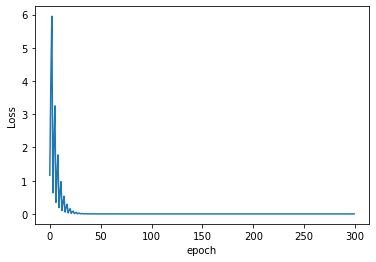

In [5]:
plt.plot(epoch_list, loss_list)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()